In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastprogress import progress_bar as pb

In [0]:
train_xs = 10*np.random.rand(100)
train_xs.sort()
train_ys = np.sin(2*train_xs) + 0.2*np.random.rand(100)
test_xs = 10*(0.8 + np.random.rand(80)) 
test_xs.sort()

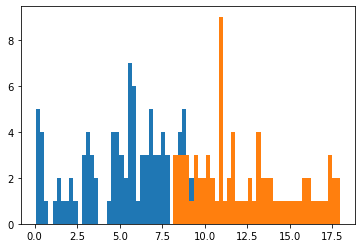

In [62]:
_ = plt.hist(train_xs, bins=40)
_ = plt.hist(test_xs, bins=40)

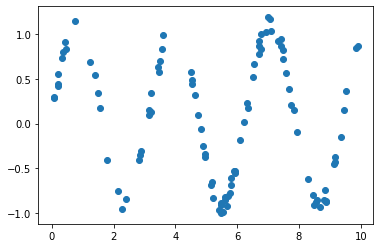

In [36]:
plt.scatter(train_xs, train_ys)

In [0]:
def kernel(x1, x2, theta1, theta2, theta3):
    x1 = np.array(x1)
    x2 = np.array(x2)

    k = theta1 * np.exp(-(x1 - x2)**2 / theta2)
    k += (x1 == x2).astype(int) * theta3

    return k

In [0]:
from itertools import combinations

In [0]:
train_x_combinations = list(combinations(train_xs, 2))
train_x_combinations_indices = list((i,j) for ((i,_),(j,_)) in combinations(enumerate(train_xs), 2))

train_x_combinations += [(x, x) for x in train_xs]
train_x_combinations_indices += [(i, i) for i in range(len(train_xs))]

train_x_combinations = np.array(train_x_combinations)

In [40]:
train_x_combinations.shape

(5050, 2)

In [0]:
THETA1 = 1.0
THETA2 = 0.4
THETA3 = 0.1

In [0]:
k_flat = kernel(train_x_combinations[:, 0], train_x_combinations[:, 1], THETA1, THETA2, THETA3)

In [0]:
K = np.zeros((len(train_xs), len(train_xs)))

In [44]:
K.shape

(100, 100)

In [0]:
for (i, j), k_ in zip(train_x_combinations_indices, k_flat):
    K[i, j] = k_
    K[j, i] = k_

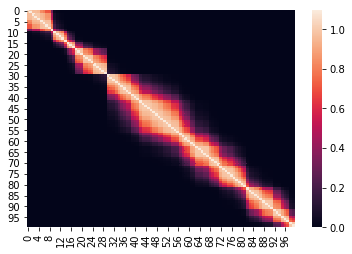

In [46]:
sns.heatmap(K)

In [0]:
Kinvy = np.dot(np.linalg.inv(K), train_ys)

In [48]:
Kinvy.shape

(100,)

In [49]:
kernel([1, 3], [2, 5], THETA1, THETA2, THETA3)

array([8.20849986e-02, 4.53999298e-05])

In [50]:
mu = []
var = []

for test_x in pb(test_xs):

    ka = kernel(
        train_xs,
        np.array([test_x]*len(train_xs)),
        THETA1, THETA2, THETA3
    )  # k_{*}

    s = kernel(test_x, test_x, THETA1, THETA2, THETA3)

    mu.append(np.dot(ka, Kinvy))

    kainvK = np.dot(ka, np.linalg.inv(K))

    var.append(s - np.dot(kainvK, ka.T))

mu = np.array(mu)
var = np.array(var)

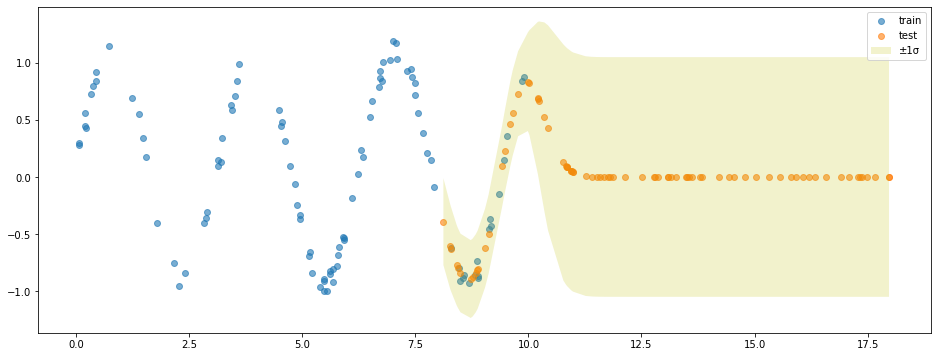

In [63]:
plt.figure(figsize=(16, 6))
plt.scatter(train_xs, train_ys, alpha=0.6, label='train')
plt.scatter(test_xs, mu, alpha=0.6, label='test')
plt.fill_between(
    test_xs,
    mu - np.sqrt(var),
    mu + np.sqrt(var),
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.legend()